# Clasificador de estrategias

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from math import sqrt
from yellowbrick.cluster import KElbowVisualizer
from statistics import stdev


In [2]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
#import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA 

In [3]:
# parameters
n = (2520) # number of observation to choose


In [4]:
# Load the data
path = '/Archivos/MIDS/GitHub/models/PI_2/Features.csv'
#Archivos/MIDS/GitHub/models/PI_2/Features.csv
Features = pd.read_csv('Data_Prices.csv', index_col=0)

In [5]:
Features.head(5)

,XLP,XLY,XLE,XLF,XLV,XLI,XLK,XLU
Date,,,,,,,,
2000-01-03,22.7500,30.1250,26.5625,18.5749,30.2969,28.8438,55.4375,27.4531
2000-01-04,22.1094,29.2188,26.0625,17.7629,29.6094,28.0469,52.6250,26.6250
2000-01-05,22.5000,28.8594,26.7500,17.6233,29.3438,27.9219,51.8438,27.2969
2000-01-06,22.9219,29.1875,27.7813,18.3973,29.4375,28.2969,50.1250,27.2500
2000-01-07,24.3750,30.5625,28.0781,18.7018,29.7969,29.3750,51.0000,27.4844


In [6]:
df = Features.tail(2520)

In [7]:
import datetime as dt
#Features['Date'] = pd.to_datetime(df['Date'])

#include = df[df['Date'].dt.year == year]


In [10]:
# calculamos el retorno y volatilidad.

returns = df.pct_change().mean()
returns = pd.DataFrame(returns)
returns.columns = ['Returns'] 
returns['Volatility'] = df.pct_change().std()

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
data

array([[0.00035323, 0.00746649],
       [0.00061566, 0.01054918],
       [0.00014655, 0.01377397],
       [0.00042756, 0.01327553],
       [0.00054157, 0.0093064 ],
       [0.00046899, 0.01118732],
       [0.00055116, 0.01053137],
       [0.00031136, 0.00894122]])

In [13]:
len(data)-1


7

Text(0.5, 1.0, 'Elbow curve')

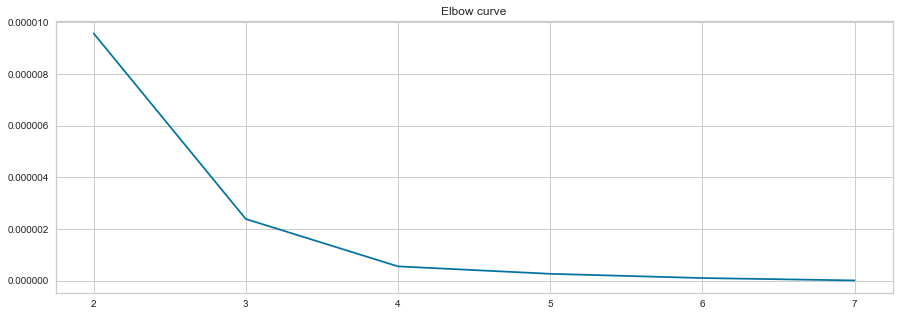

In [12]:
X = data
distorsions = []
for k in range(2, len(data)):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, len(data)), distorsions)
plt.grid(True)
plt.title('Elbow curve')

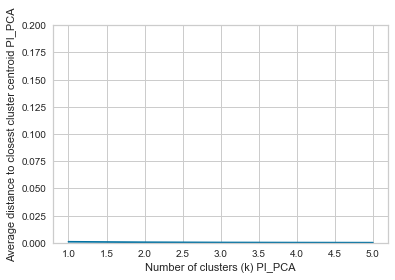

C:\Users\Javier\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Javier\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Javier\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


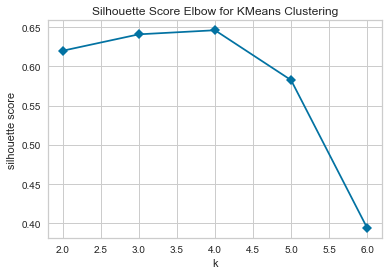

In [16]:
#Escoger k
distance_to_closter_cluster_centre = []
for k in range(2,(len(data)-1)):
    k_means = KMeans(n_clusters=k)  
    k_means.fit(X)
    distance = np.min(k_means.transform(X),axis=1)
    average_distance = np.mean(distance)
    distance_to_closter_cluster_centre.append(average_distance)

clusters = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k) PI_PCA')
plt.ylabel('Average distance to closest cluster centroid PI_PCA')
plt.ylim(0,0.2)
plt.show()

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(k_means, k=(2,7), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()

In [17]:
# aplicar K-means de sklearn
n_samples = 1500
random_state = 170

# Incorrect number of clusters
kmeans1 = KMeans(n_clusters=4, random_state=random_state)
kmeans1.fit(X)
y_pred = kmeans1.fit_predict(X) 
  
print('\nCluster centres PI:')
print(kmeans1.cluster_centers_)


Cluster centres PI:
[[0.00028705 0.01352475]
 [0.00042646 0.00912381]
 [0.00054527 0.01075596]
 [0.00035323 0.00746649]]


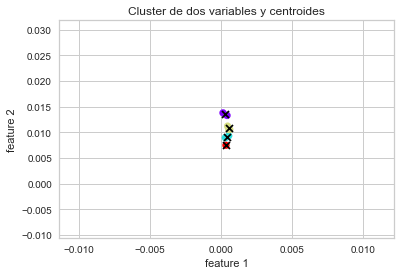

In [18]:
#grafica de las columnas 1 y 2 
labels1 = kmeans1.labels_

plt.scatter(X[:,0],X[:,1],c=labels1, cmap=plt.cm.rainbow)
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], c='Black', marker='x')
plt.title("Cluster de dos variables y centroides")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show() 

In [20]:
def CH_index(X, labels, centroids):
    mean = np.mean(X,axis=0) 
    B = np.sum([ np.sum(labels==i)*(c - mean)**2 for i,c in enumerate(centroids)])
    W = np.sum([ (X-centroids[labels[i]])**2 for i, X in enumerate(X)])
    c = len(centroids)
    n = len(X)
    return ((n-c)*B )/1.0/((c-1)*W)

In [22]:
# Calculate silhouette_score
print('\n Silhouette_score PI_STD:')
print(silhouette_score(X, kmeans1.labels_))

CH_index_std=CH_index(X, kmeans1.labels_, kmeans1.cluster_centers_)
print('\n CH_index_std:',CH_index_std)


 Silhouette_score PI_STD:
0.6461707199945902

 CH_index_std: 76.63846383368555


In [23]:
data=pd.DataFrame({'Returns': data[:, 0], 'Volatility': data[:, 1]})
data['ClusterkMeans'] = labels1
data

,Returns,Volatility,ClusterkMeans
0,0.000353,0.007466,3
1,0.000616,0.010549,2
2,0.000147,0.013774,0
3,0.000428,0.013276,0
4,0.000542,0.009306,1
5,0.000469,0.011187,2
6,0.000551,0.010531,2
7,0.000311,0.008941,1


In [24]:
sharpeclusters =[] 
Features = Features.tail(n)
for i in range(data['ClusterkMeans'].nunique()):
    
    l = data.loc[data['ClusterkMeans'] == i].index.values.astype(int).tolist()
    dfexp=Features.pct_change().iloc[: , l].sum(axis = 1, skipna = True)
    r = dfexp.mean()
    s = stdev(dfexp)
    
    sharpeclusters.append(r/s)
sharpeclusters = np.asanyarray(sharpeclusters)

In [25]:
selection = sharpeclusters.argmax()


In [26]:
cond = data['ClusterkMeans'] == selection

data['selection'] = np.where(cond, 1, 0)


In [27]:
data

,Returns,Volatility,ClusterkMeans,selection
0,0.000353,0.007466,3,0
1,0.000616,0.010549,2,0
2,0.000147,0.013774,0,0
3,0.000428,0.013276,0,0
4,0.000542,0.009306,1,1
5,0.000469,0.011187,2,0
6,0.000551,0.010531,2,0
7,0.000311,0.008941,1,1


In [28]:
sharpeclusters


array([0.02296338, 0.05416888, 0.05341629, 0.04729916])